## Flight prediction


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from IPython.display import display # Allows the use of display() for DataFrames
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})


%matplotlib inline

In [2]:
dfflight = pd.read_csv('train.csv', na_values = '?')
dfflight

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
dfflight.shape

(103904, 25)

## Data Cleaning

In [4]:
# drop NaN columns and rows
dfflight = pd.read_csv('train.csv', na_values = '?')
print('Original Size:', dfflight.shape)

dfflight.dropna(how = 'all', inplace=True)
print('Size After Dropping Rows with NaN in All Columns:', dfflight.shape)

Original Size: (103904, 25)
Size After Dropping Rows with NaN in All Columns: (103904, 25)


## Data Transformations

In [5]:
# Removing Duplicates
dfflight.drop_duplicates(inplace=True)
print('Size After Dropping Duplicates', dfflight.shape)

Size After Dropping Duplicates (103904, 25)


In [6]:
dfflight['satisfaction'].value_counts(dropna=False)

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [7]:
# Replacing values and convert target variable to boolean
data_with_satisfaction = dfflight[(dfflight['satisfaction']=="neutral or dissatisfied") | (dfflight['satisfaction']=="satisfied")]
dif = {"neutral or dissatisfied":0, "satisfied":1} 
dfflight_withBoolTarget = data_with_satisfaction.replace({"satisfaction": dif})

In [8]:
dfflight['Customer Type'].value_counts(dropna=False)

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [9]:
# Replacing values and convert target variable to boolean
dif2 = {"Loyal Customer":1, "disloyal Customer":2}
dfFlight = dfflight_withBoolTarget.replace({"Customer Type": dif2})

In [10]:
dfFlight.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,1,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,2,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,1,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,1,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,1,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,5,111157,Female,1,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,0
6,6,82113,Male,1,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,0
7,7,96462,Female,1,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,1
8,8,79485,Female,1,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,0
9,9,65725,Male,2,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,0


## Removing Columns

In [11]:
# Correlation
dfCorr = dfFlight
corrMat = dfCorr.corr()
print(corrMat)

                                   Unnamed: 0        id  Customer Type  \
Unnamed: 0                           1.000000  0.002991      -0.002844   
id                                   0.002991  1.000000       0.000145   
Customer Type                       -0.002844  0.000145       1.000000   
Age                                  0.004786  0.022857      -0.281674   
Flight Distance                      0.002794  0.095544      -0.225200   
Inflight wifi service               -0.002490 -0.021276      -0.007543   
Departure/Arrival time convenient    0.000739 -0.002110      -0.206869   
Ease of Online booking               0.001913  0.014163      -0.019509   
Gate location                        0.005073 -0.000606       0.006078   
Food and drink                      -0.002162  0.001063      -0.059454   
Online boarding                      0.001002  0.055477      -0.189262   
Seat comfort                         0.000044  0.052903      -0.159484   
Inflight entertainment               0

Because we want to predict customer satisfaction, so we will foucus on the factors which have closer correlation with satisfaction. From the correlation form,we will drop some features which are not useful for predicting the customer satisfaction

In [12]:
#deleting some more columns
del_col_names = ["id","Unnamed: 0","Departure/Arrival time convenient","Gate location","Departure Delay in Minutes", 
"Arrival Delay in Minutes", "Customer Type","Flight Distance","Ease of Online booking"] 
dataset = dfFlight.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (103904, 16)


## Correlation and Regression

In [13]:
dfCorr = dataset
corrMat = dfCorr.corr()
print(corrMat)

                             Age  Inflight wifi service  Food and drink  \
Age                     1.000000               0.017859        0.023000   
Inflight wifi service   0.017859               1.000000        0.134718   
Food and drink          0.023000               0.134718        1.000000   
Online boarding         0.208939               0.456970        0.234468   
Seat comfort            0.160277               0.122658        0.574556   
Inflight entertainment  0.076444               0.209321        0.622512   
On-board service        0.057594               0.121500        0.059073   
Leg room service        0.040583               0.160473        0.032498   
Baggage handling       -0.047529               0.120923        0.034746   
Checkin service         0.035482               0.043193        0.087299   
Inflight service       -0.049427               0.110441        0.033993   
Cleanliness             0.053611               0.132698        0.657760   
satisfaction            0

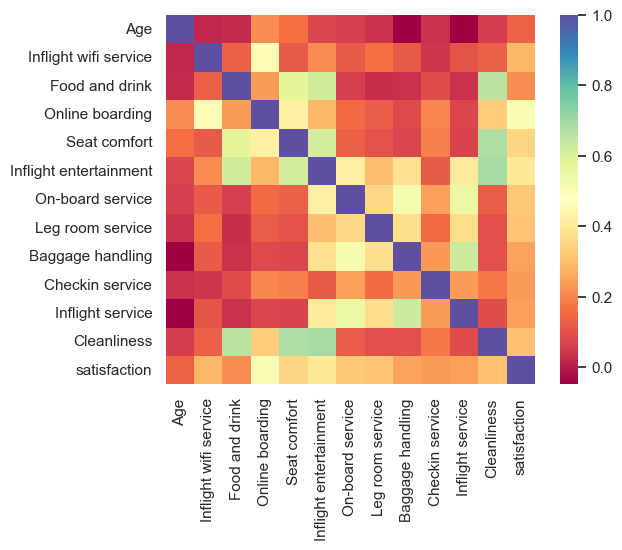

In [14]:
sns.heatmap(corrMat, vmax = 1, square = True, cmap="Spectral") 
plt.savefig("corrPlot.png", dpi = 300,bbox_inches = 'tight')

In [15]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

import matplotlib.pylab as plt
%matplotlib inline 

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [16]:
# count all data types
print(dataset.dtypes.value_counts())

int64     13
object     3
dtype: int64


There are 3 values are needed to be addressed. I will deal with them in the following steps.

In [17]:
object_columns = dataset.select_dtypes(include=["object"])
print (object_columns.iloc[0])

Gender                       Male
Type of Travel    Personal Travel
Class                    Eco Plus
Name: 0, dtype: object


In [18]:
# encode categorical value with dummy variables.
categorical_columns = ["Gender", "Type of Travel", "Class"]
dummy_df = pd.get_dummies(dataset[categorical_columns])
flight_data = pd.concat([dataset, dummy_df], axis=1)
flights_data = flight_data.drop(categorical_columns, axis=1)
flights_data.head()

,Age,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,3,5,3,5,5,4,3,4,4,5,5,0,0,1,0,1,0,0,1
1,25,3,1,3,1,1,1,5,3,1,4,1,0,0,1,1,0,1,0,0
2,26,2,5,5,5,5,4,3,4,4,4,5,1,1,0,1,0,1,0,0
3,25,2,2,2,2,2,2,5,3,1,4,2,0,1,0,1,0,1,0,0
4,61,3,4,5,5,3,3,4,4,3,3,3,1,0,1,1,0,1,0,0


In [19]:
# cleaned and filtered data to csv
flights_data.to_csv('clean_flight_data.csv', index = False)

In [20]:
flights = pd.read_csv('clean_flight_data.csv')

In [21]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Age                             103904 non-null  int64
 1   Inflight wifi service           103904 non-null  int64
 2   Food and drink                  103904 non-null  int64
 3   Online boarding                 103904 non-null  int64
 4   Seat comfort                    103904 non-null  int64
 5   Inflight entertainment          103904 non-null  int64
 6   On-board service                103904 non-null  int64
 7   Leg room service                103904 non-null  int64
 8   Baggage handling                103904 non-null  int64
 9   Checkin service                 103904 non-null  int64
 10  Inflight service                103904 non-null  int64
 11  Cleanliness                     103904 non-null  int64
 12  satisfaction                    103904 non-n

In [22]:
# load diabetes dataset
df = flights
print(df.columns)

Index(['Age', 'Inflight wifi service', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'satisfaction', 'Gender_Female',
       'Gender_Male', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')


## Training Model

In [23]:
y = df.pop('satisfaction')
X = df
X_train, X_test, train_labels, test_labels = train_test_split(X.index, y, test_size=0.3)
train = X.iloc[X_train].values
test = X.iloc[X_test].values

print('Training Set (Features) Size:', len(train))
print('Training Set (Labels) Size:', len(train_labels))
print('Test Set (Features) Size:', len(test))
print('Test Set (Labels) Size:', len(test))
print('Data loading done. Total {} trainig samples and {} testing samples.'.format(train_labels.shape[0], test_labels.shape[0]))

Training Set (Features) Size: 72732
Training Set (Labels) Size: 72732
Test Set (Features) Size: 31172
Test Set (Labels) Size: 31172
Data loading done. Total 72732 trainig samples and 31172 testing samples.


### Models

1.K-Nearest Neighbors

2.Naive Bayes 

3.Logistic Regression 

4.Desicion Tree

5.Random Forest

## K-Nearest Neighbors

************KNN Cross Validation on Train************
Classification accuracy: [0.90492493 0.90409998 0.90418248]


Confusion matrix: 
[[39095  2169]
 [ 4784 26684]]


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     41264
           1       0.92      0.85      0.88     31468

    accuracy                           0.90     72732
   macro avg       0.91      0.90      0.90     72732
weighted avg       0.91      0.90      0.90     72732

************KNN Test************
Test Classification accuracy: 0.9074489926857436


Test Confusion matrix: 
[[16726   889]
 [ 1996 11561]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     17615
           1       0.93      0.85      0.89     13557

    accuracy                           0.91     31172
   macro avg       0.91      0.90      0.90     31172
weighted avg       0.91      0.91      

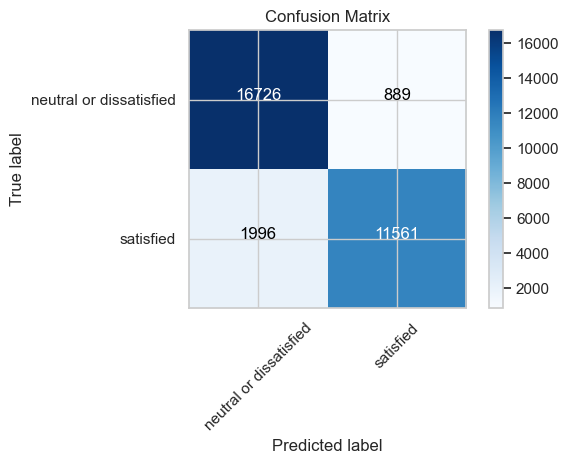

In [24]:
# 1. Train and test on KNN
K = 5
model = neighbors.KNeighborsClassifier(n_neighbors=K, weights='uniform')
model.fit(train, train_labels)

train_predicted_cross_val = cross_val_predict(model, train, train_labels, cv=3)
conf_matrix_cross_val = confusion_matrix(train_labels, train_predicted_cross_val)
print('************KNN Cross Validation on Train************')
print("Classification accuracy:", cross_val_score(model, train, train_labels, cv=3, scoring = 'accuracy'))
print("\n")
print ("Confusion matrix: \n" + str(conf_matrix_cross_val))
print("\n")
print("Classification Report:\n", classification_report(train_labels, train_predicted_cross_val))

test_predicted = model.predict(test)
conf_matrix = confusion_matrix(test_labels, test_predicted)
print('************KNN Test************')
print("Test Classification accuracy:", model.score(test, test_labels))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix))
print("\n")
print("Test Classification Report:\n", classification_report(test_labels, test_predicted))

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['neutral or dissatisfied','satisfied'], title='Confusion Matrix')
plt.show()

In [25]:
y_pred_prob = model.predict_proba(test)[:, 1]

Area Under the Curve (AUC):
 0.9552061542029279


/var/folders/v2/057j_3_n2fl9tt6sp1ywkdtr0000gn/T/ipykernel_12423/2903649824.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='r')


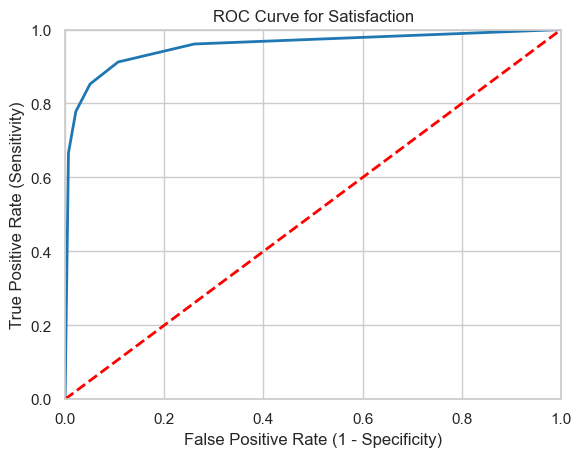

In [26]:
## ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC Curve for Satisfaction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area Under the Curve (AUC):\n", roc_auc_score(test_labels, y_pred_prob))
#higher AUC indicates better classifier

### Naive Bayes

************Naive Bayes Cross Validation on Train ************
Classification accuracy: [0.83991916 0.8415278  0.84024913]


Confusion matrix: 
[[34821  6443]
 [ 5153 26315]]


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86     41264
           1       0.80      0.84      0.82     31468

    accuracy                           0.84     72732
   macro avg       0.84      0.84      0.84     72732
weighted avg       0.84      0.84      0.84     72732

************Naive Bayes Test************
Test Classification accuracy: 0.8424868471705377


Test Confusion matrix: 
[[14922  2693]
 [ 2217 11340]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     17615
           1       0.81      0.84      0.82     13557

    accuracy                           0.84     31172
   macro avg       0.84      0.84      0.84     31172
weighted avg       0.8

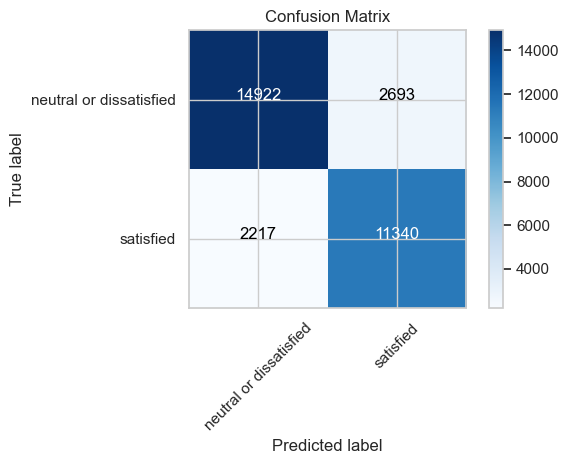

In [27]:
# 2. Train and test on Naive Bayes
model = GaussianNB()
model.fit(train, train_labels)

train_predicted_cross_val = cross_val_predict(model, train, train_labels, cv=3)
conf_matrix_cross_val = confusion_matrix(train_labels, train_predicted_cross_val)
print('************Naive Bayes Cross Validation on Train ************')
print("Classification accuracy:", cross_val_score(model, train, train_labels, cv=3, scoring = 'accuracy'))
print("\n")
print ("Confusion matrix: \n" + str(conf_matrix_cross_val))
print("\n")
print("Classification Report:\n", classification_report(train_labels, train_predicted_cross_val))

test_predicted = model.predict(test)
conf_matrix = confusion_matrix(test_labels, test_predicted)
print('************Naive Bayes Test************')
print("Test Classification accuracy:", model.score(test, test_labels))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix))
print("\n")
print("Test Classification Report:\n", classification_report(test_labels, test_predicted))

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['neutral or dissatisfied','satisfied'], title='Confusion Matrix')
plt.show()

Area Under the Curve (AUC):
 0.9090453819410443


/var/folders/v2/057j_3_n2fl9tt6sp1ywkdtr0000gn/T/ipykernel_12423/3444115697.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='r')


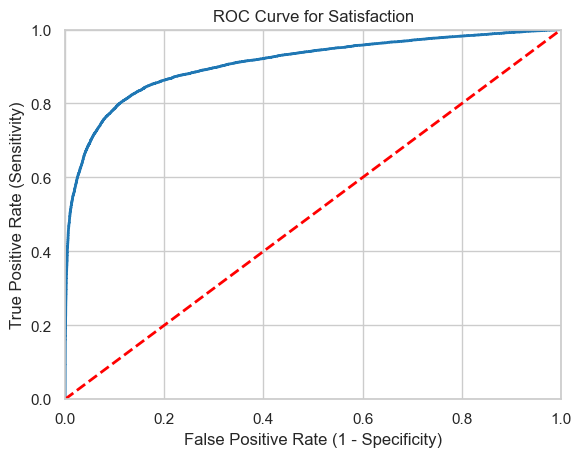

In [28]:
## ROC Curve
y_pred_prob = model.predict_proba(test)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC Curve for Satisfaction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area Under the Curve (AUC):\n", roc_auc_score(test_labels, y_pred_prob))
#higher AUC indicates better classifier

### Logistic Regression

/Users/jinqianhui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jinqianhui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

************Logistic Regression Cross Validation on Train ************


/Users/jinqianhui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jinqianhui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Classification accuracy: [0.85571688 0.86107903 0.85501567]


Confusion matrix: 
[[36580  4684]
 [ 5697 25771]]


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     41264
           1       0.85      0.82      0.83     31468

    accuracy                           0.86     72732
   macro avg       0.86      0.85      0.85     72732
weighted avg       0.86      0.86      0.86     72732

************Logistic Regression Test************
Test Classification accuracy: 0.85993840626203


Test Confusion matrix: 
[[15666  1949]
 [ 2417 11140]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     17615
           1       0.85      0.82      0.84     13557

    accuracy                           0.86     31172
   macro avg       0.86      0.86      0.86     31172
weighted avg       0.86      0.86      0.86     31172

Confusion matrix, withou

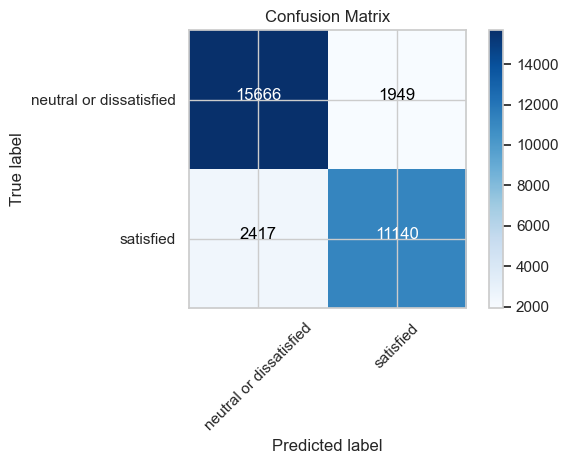

In [29]:
# 3. Train and test on Logistic Regression
model = linear_model.LogisticRegression()
model.fit(train, train_labels)

train_predicted_cross_val = cross_val_predict(model, train, train_labels, cv=3)
conf_matrix_cross_val = confusion_matrix(train_labels, train_predicted_cross_val)
print('************Logistic Regression Cross Validation on Train ************')
print("Classification accuracy:", cross_val_score(model, train, train_labels, cv=3, scoring = 'accuracy'))
print("\n")
print ("Confusion matrix: \n" + str(conf_matrix_cross_val))
print("\n")
print("Classification Report:\n", classification_report(train_labels, train_predicted_cross_val))

test_predicted = model.predict(test)
conf_matrix = confusion_matrix(test_labels, test_predicted)
print('************Logistic Regression Test************')
print("Test Classification accuracy:", model.score(test, test_labels))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix))
print("\n")
print("Test Classification Report:\n", classification_report(test_labels, test_predicted))

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['neutral or dissatisfied','satisfied'], title='Confusion Matrix')
plt.show()

Area Under the Curve (AUC):
 0.9162432329380573


/var/folders/v2/057j_3_n2fl9tt6sp1ywkdtr0000gn/T/ipykernel_12423/3444115697.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='r')


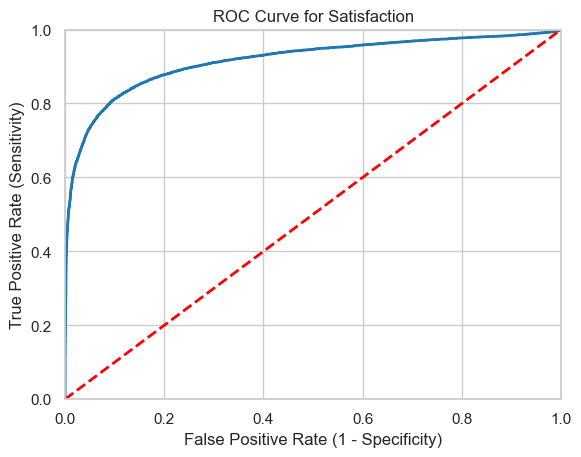

In [30]:
## ROC Curve
y_pred_prob = model.predict_proba(test)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC Curve for Satisfaction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area Under the Curve (AUC):\n", roc_auc_score(test_labels, y_pred_prob))
#higher AUC indicates better classifier

### Decision Tree

************Decision Tree Cross Validation on Train ************
Classification accuracy: [0.9323544  0.93511797 0.93421053]


Confusion matrix: 
[[39409  1855]
 [ 2953 28515]]


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     41264
           1       0.94      0.91      0.92     31468

    accuracy                           0.93     72732
   macro avg       0.93      0.93      0.93     72732
weighted avg       0.93      0.93      0.93     72732

************Decision Tree Test************
Test Classification accuracy: 0.9360644167842936


Test Confusion matrix: 
[[16915   700]
 [ 1293 12264]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     17615
           1       0.95      0.90      0.92     13557

    accuracy                           0.94     31172
   macro avg       0.94      0.93      0.93     31172
weighted avg      

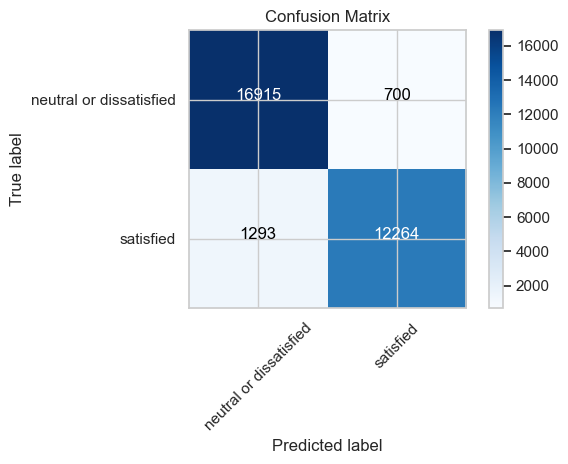

In [31]:
# 4. Train and Test on Desicion Tree
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(train, train_labels)

train_predicted_cross_val = cross_val_predict(model, train, train_labels, cv=3)
conf_matrix_cross_val = confusion_matrix(train_labels, train_predicted_cross_val)
print('************Decision Tree Cross Validation on Train ************')
print("Classification accuracy:", cross_val_score(model, train, train_labels, cv=3, scoring = 'accuracy'))
print("\n")
print ("Confusion matrix: \n" + str(conf_matrix_cross_val))
print("\n")
print("Classification Report:\n", classification_report(train_labels, train_predicted_cross_val))

test_predicted = model.predict(test)
conf_matrix = confusion_matrix(test_labels, test_predicted)
print('************Decision Tree Test************')
print("Test Classification accuracy:", model.score(test, test_labels))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix))
print("\n")
print("Test Classification Report:\n", classification_report(test_labels, test_predicted))

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['neutral or dissatisfied','satisfied'], title='Confusion Matrix')
plt.show()

Area Under the Curve (AUC):
 0.9809018538038037


/var/folders/v2/057j_3_n2fl9tt6sp1ywkdtr0000gn/T/ipykernel_12423/3444115697.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='r')


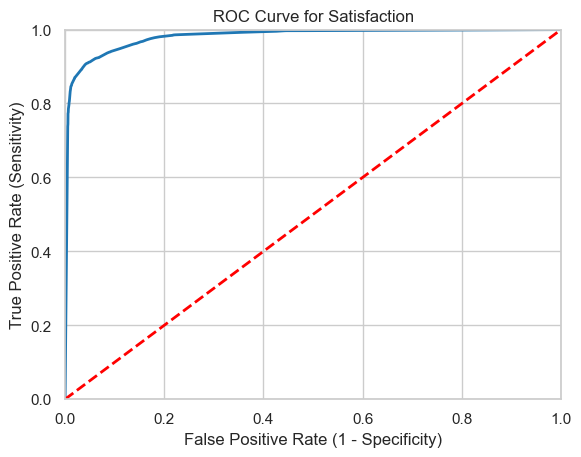

In [32]:
## ROC Curve
y_pred_prob = model.predict_proba(test)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC Curve for Satisfaction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area Under the Curve (AUC):\n", roc_auc_score(test_labels, y_pred_prob))
#higher AUC indicates better classifier

### Random Forest

************Random Forest Cross Validation on Train ************
Classification accuracy: [0.93742782 0.93982016 0.93763405]


Confusion matrix: 
[[39174  2090]
 [ 2398 29070]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     41264
           1       0.93      0.92      0.93     31468

    accuracy                           0.94     72732
   macro avg       0.94      0.94      0.94     72732
weighted avg       0.94      0.94      0.94     72732

************Random Forest Test************
Test Classification accuracy: 0.9405877069164635


Test Confusion matrix: 
[[16736   879]
 [  973 12584]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     17615
           1       0.93      0.93      0.93     13557

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg      

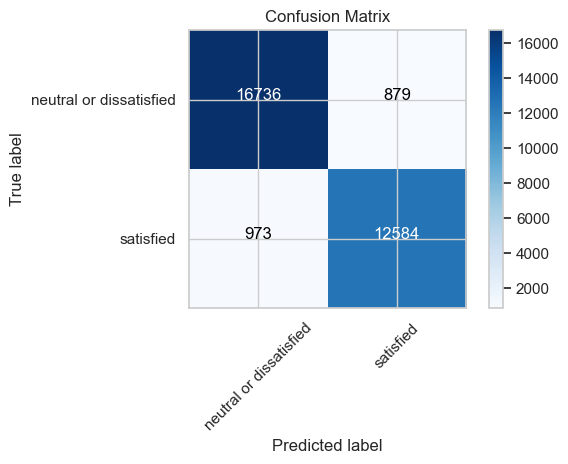

In [33]:
# 5. Train and Test on Random Forest
model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)
model.fit(train, train_labels)

train_predicted_cross_val = cross_val_predict(model, train, train_labels, cv=3)
conf_matrix_cross_val = confusion_matrix(train_labels, train_predicted_cross_val)
print('************Random Forest Cross Validation on Train ************')
print("Classification accuracy:", cross_val_score(model, train, train_labels, cv=3, scoring = 'accuracy'))
print("\n")
print ("Confusion matrix: \n" + str(conf_matrix_cross_val))
print("\n")
print("Classification Report:\n", classification_report(train_labels, train_predicted_cross_val))

test_predicted = model.predict(test)
conf_matrix = confusion_matrix(test_labels, test_predicted)
print('************Random Forest Test************')
print("Test Classification accuracy:", model.score(test, test_labels))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix))
print("\n")
print("Test Classification Report:\n", classification_report(test_labels, test_predicted))

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['neutral or dissatisfied','satisfied'], title='Confusion Matrix')
plt.show()

Area Under the Curve (AUC):
 0.9863605356226507


/var/folders/v2/057j_3_n2fl9tt6sp1ywkdtr0000gn/T/ipykernel_12423/3444115697.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='r')


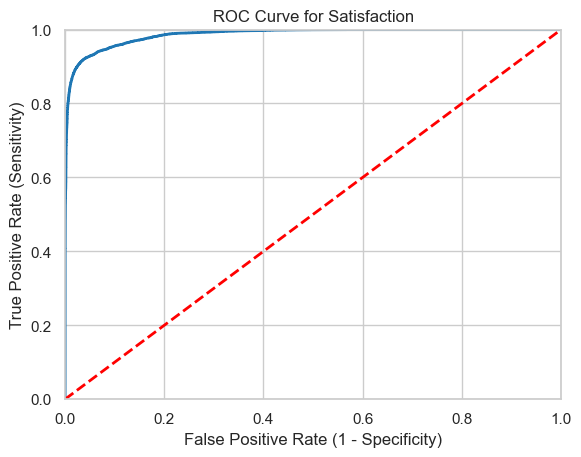

In [34]:
## ROC Curve
y_pred_prob = model.predict_proba(test)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC Curve for Satisfaction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area Under the Curve (AUC):\n", roc_auc_score(test_labels, y_pred_prob))
#higher AUC indicates better classifier

['Age', 'Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Gender_Female', 'Gender_Male', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']
Feature importances:
[0.019074   0.17112474 0.01037988 0.24829101 0.04938793 0.05188588
 0.02881811 0.03978855 0.02311688 0.01796443 0.02033107 0.02383733
 0.00154924 0.0014833  0.07575076 0.07719733 0.08508669 0.05349573
 0.00143713]


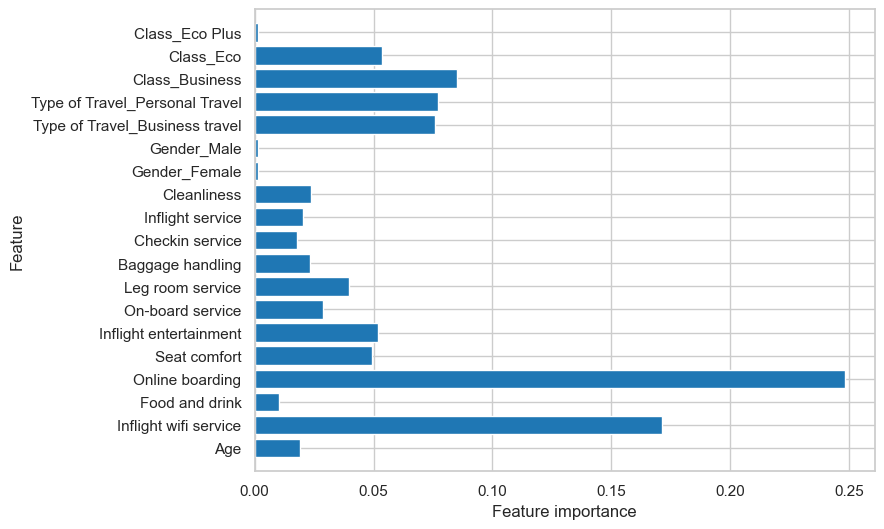

In [35]:
# Print feature importances in Random Forest
df_features = list(df.columns)
def plot_feature_importances_df(model):
    plt.figure(figsize=(8,6))
    n_features = 19
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
print(df_features)
print("Feature importances:\n{}".format(model.feature_importances_))
plot_feature_importances_df(model)
plt.show('feature_importance')

In [36]:
# Calculate the % of satisfied
test_labels.mean()

0.4349095341973566

In [37]:
# Calculate the % of neutral or dissatisfied
1-test_labels.mean()

0.5650904658026434

Compared with all of the models, we think Random Forest does a better work than other models. The AOC ratio is the highest which indicates a better classifier. The weighted average precisions on both test and train data are same high and also has a better performance than other models. 